# Load Package

In [3]:
%load_ext autoreload
%autoreload 2

import sys
from os.path import join
from tqdm.auto import tqdm
import joblib
import torch
sys.path.append("../../")

from src.file_processing.processing_predictions import load_pi_df_dict
from src.evaluation.perf_eval import get_prediction_performance_table, display_pred_perf
from src.evaluation.ue_eval import get_ue_performance_table, display_ue_perf, restructure_ue_df
from src.evaluation.pi_eval import get_pi_performance_table, display_pi_perf
from src.evaluation.pi_plots import plot_predictions_with_pi_across_methods
from src.misc import create_folder
from ue_pi_dicts import ue_dict, pi_dict
from seed_file import seed

seed = 2023
data_label = "physionet"
batch_size = 64

# File paths
fp_notebooks_folder = "../"
fp_project_folder = join(fp_notebooks_folder, "../")
fp_processed_data_folder = join(fp_project_folder, "processed_data")
fp_output_data_folder = join(fp_processed_data_folder, "physionet")
fp_checkpoint_folder = join(fp_project_folder, "checkpoints")
fp_project_checkpoints = join(fp_checkpoint_folder, data_label)
fp_tuning = join(fp_project_checkpoints, "tuning")
fp_models = join(fp_project_checkpoints, "models")
fp_predictions = join(fp_project_checkpoints, "predictions")
fp_pi_predictions = join(fp_project_checkpoints, "pi_predictions")
fp_evaluation = join(fp_project_checkpoints, "model_evaluation")

# Seed filepaths
fp_cur_model_folder = join(fp_models, str(seed))
create_folder(fp_cur_model_folder)
fp_cur_predictions_folder = join(fp_predictions, str(seed))
create_folder(fp_cur_predictions_folder)
fp_cur_pi_predictions_folder = join(fp_pi_predictions, str(seed))
create_folder(fp_cur_pi_predictions_folder)
fp_cur_evaluation_folder = join(fp_evaluation, str(seed))
create_folder(fp_cur_evaluation_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load PI Prediction Dict

In [4]:
pi_df_dict = load_pi_df_dict(fp_cur_pi_predictions_folder)

  0%|          | 0/3 [00:00<?, ?it/s]

Loaded df_dict!


# Prediction Performance

In [11]:
pred_perf_df = get_prediction_performance_table(pi_df_dict, ue_dict)
display_pred_perf(pred_perf_df)
pred_perf_df.to_csv(join(fp_cur_evaluation_folder, "pred_perf.csv"))

,t+1,t+2,t+3
Model,,,
RUE,0.001958,0.002436,0.002729
MC Dropout,0.001970,0.002444,0.002734
GPR,0.001922,0.002383,0.002680
Infer-Noise,0.001958,0.002436,0.002729
BNN,0.005205,0.005244,0.005327
DER,0.002006,0.002474,0.002836


# UE Performance

In [12]:
ue_perf_df = get_ue_performance_table(pi_df_dict, ue_dict)
ue_perf_df = restructure_ue_df(ue_perf_df)
display_ue_perf(ue_perf_df)
ue_perf_df.to_csv(join(fp_cur_evaluation_folder, "ue_perf.csv"))

t+1


t+2


t+3


# PI Performance

In [3]:
pi_perf_df = get_pi_performance_table(pi_df_dict, pi_dict)
display_pi_perf(pi_perf_df)
pi_perf_df.to_csv(join(fp_cur_evaluation_folder, "pi_perf.csv"))

t+1:


t+2:


t+3:


# Plot PI

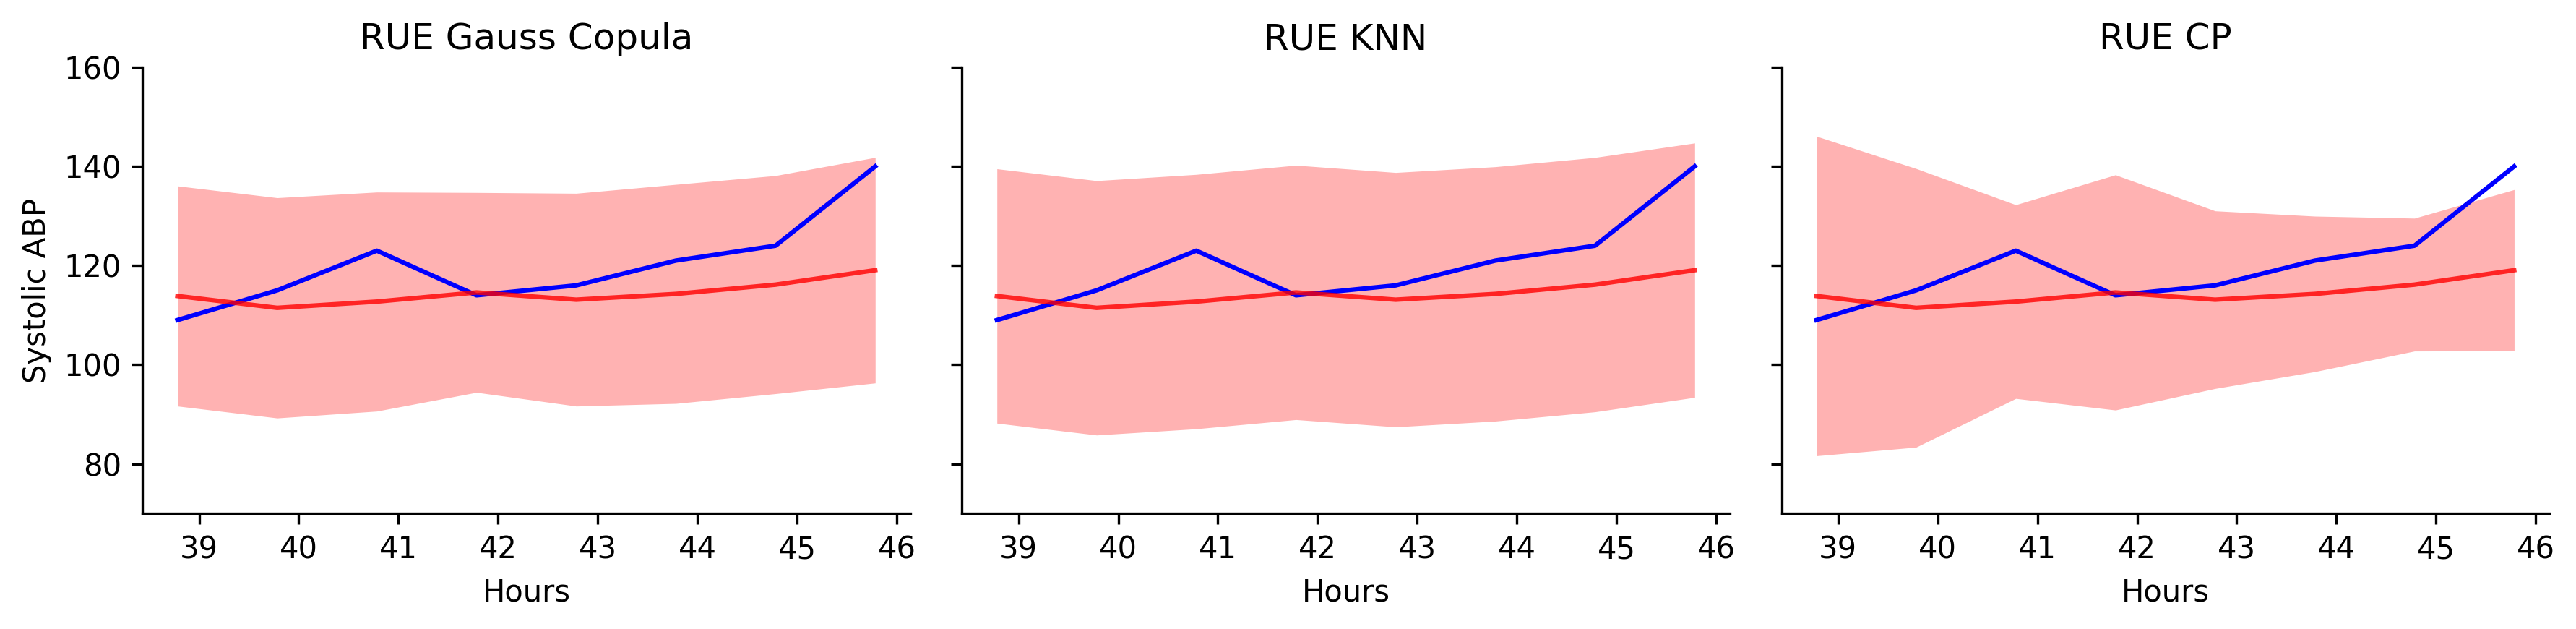

In [10]:
plot_predictions_with_pi_across_methods(
    pi_df_dict, pi_dict, record=142692, time_col="time_t+1",
    fp_cur_evaluation_folder=fp_cur_evaluation_folder, dpi=300, save_fig=True,
    display_feature="SysABP", regressor_label="t+1", ylim=[70, 160],
    pi_order=["RUE Gauss Copula", "RUE KNN", "RUE CP"], xlabel="Hours", ylabel="Systolic ABP"
)